In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('wine_quality_merged.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.isna().sum()/df.shape[0]*100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
type                    0.0
dtype: float64

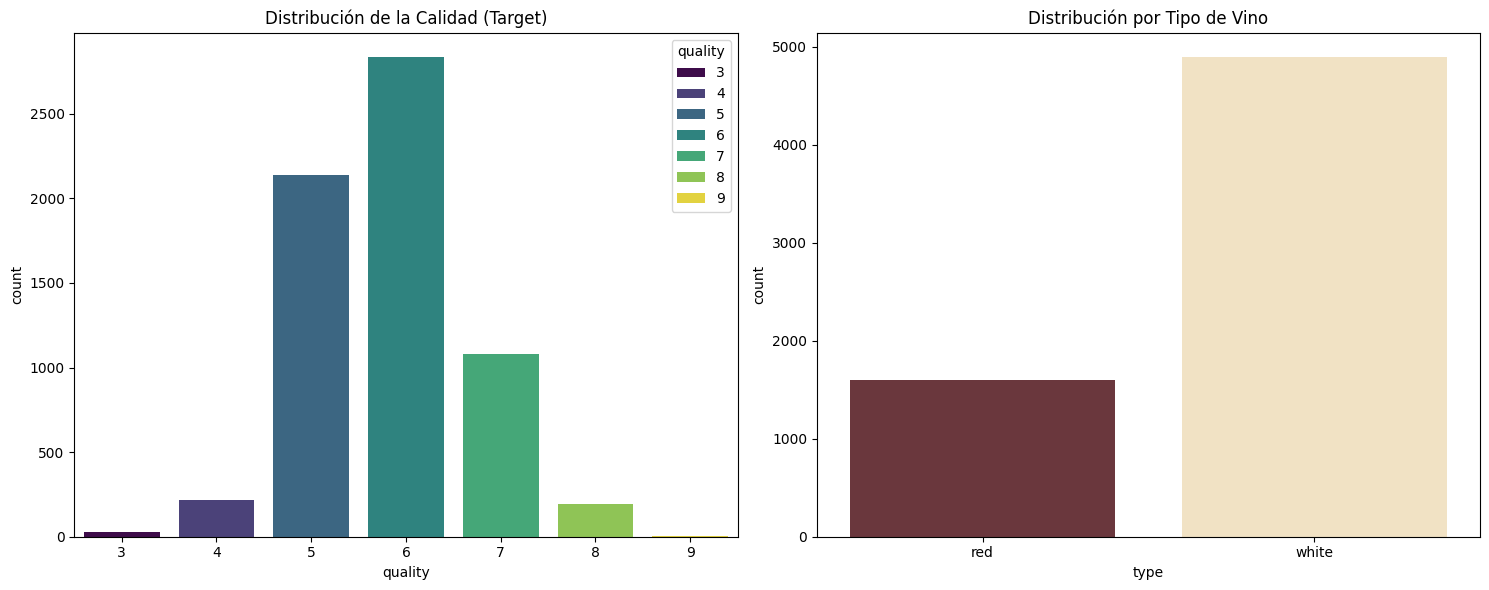

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Distribución de Calidad
sns.countplot(x='quality', data=df, ax=ax1, palette='viridis', hue='quality')
ax1.set_title('Distribución de la Calidad (Target)')
# ax1.get_legend().remove()

# Proporción de Tipo de Vino
sns.countplot(x='type', data=df, ax=ax2, palette=['#722f37', '#f9e5bc'], hue='type')
ax2.set_title('Distribución por Tipo de Vino')
# ax2.get_legend().remove()

plt.tight_layout()
ruta_guardado = os.path.join (r'A:/Clases/practica_vinos/graficos', 'Calidad_tipo.png')
plt.savefig(ruta_guardado)

Análisis:  la mayoría de los vinos tienen notas de 5, 6 y 7. Hay muy pocos vinos "excelentes" (8 o 9) o "muy malos" (3). Esto indica que el modelo tendrá menos ejemplos para aprender a identificar los extremos. También  hay casi 3 veces más vino blanco que tinto.

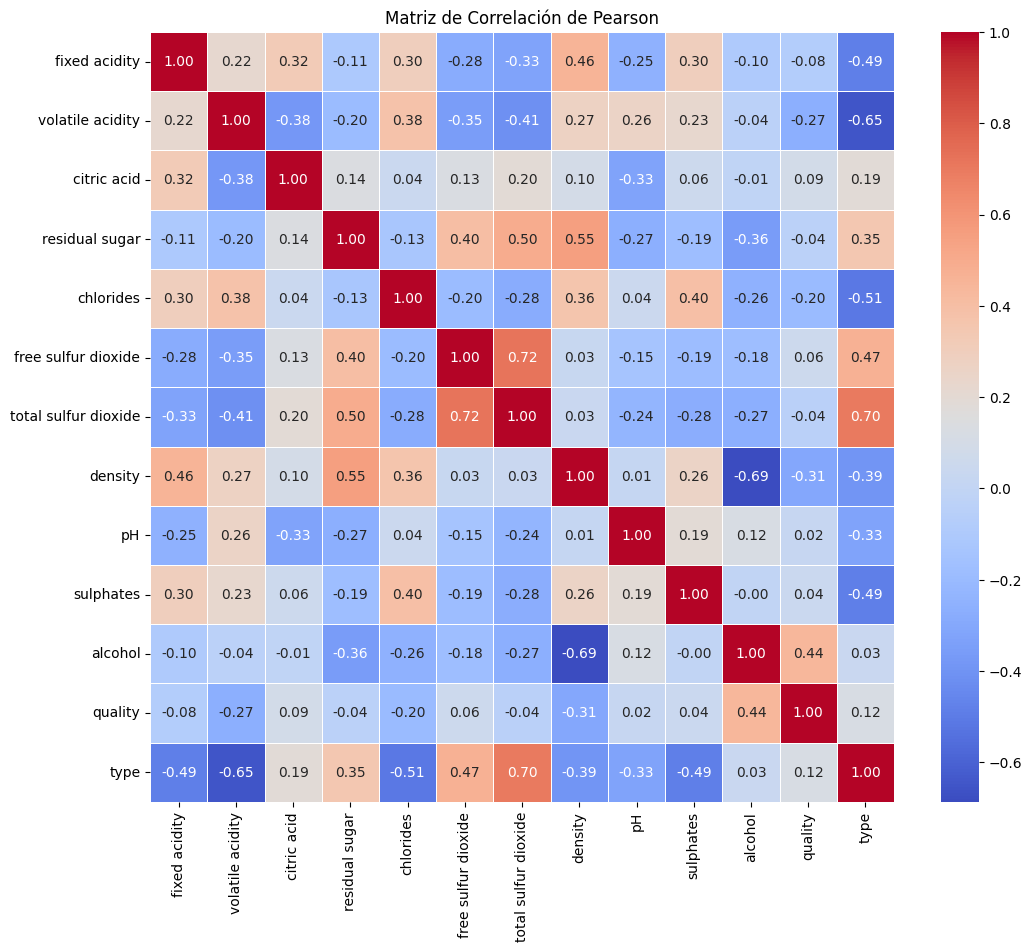

<Figure size 640x480 with 0 Axes>

In [13]:
# MATRIZ DE CORRELACION

plt.figure(figsize=(12, 10))
df_corr = df.copy()
df_corr['type'] = df_corr['type'].map({'red': 0, 'white': 1})

sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Pearson')
plt.show()
ruta_guardado = os.path.join (r'A:/Clases/practica_vinos/graficos', 'matriz.png')
plt.savefig(ruta_guardado)

Análisis: el alcohol tiene una correlación positiva alta (a más alcohol, suele subir la calidad) y la acidez volátil tiene una correlación negativa (mucha acidez volátil da sabor a vinagre, bajando la calidad).

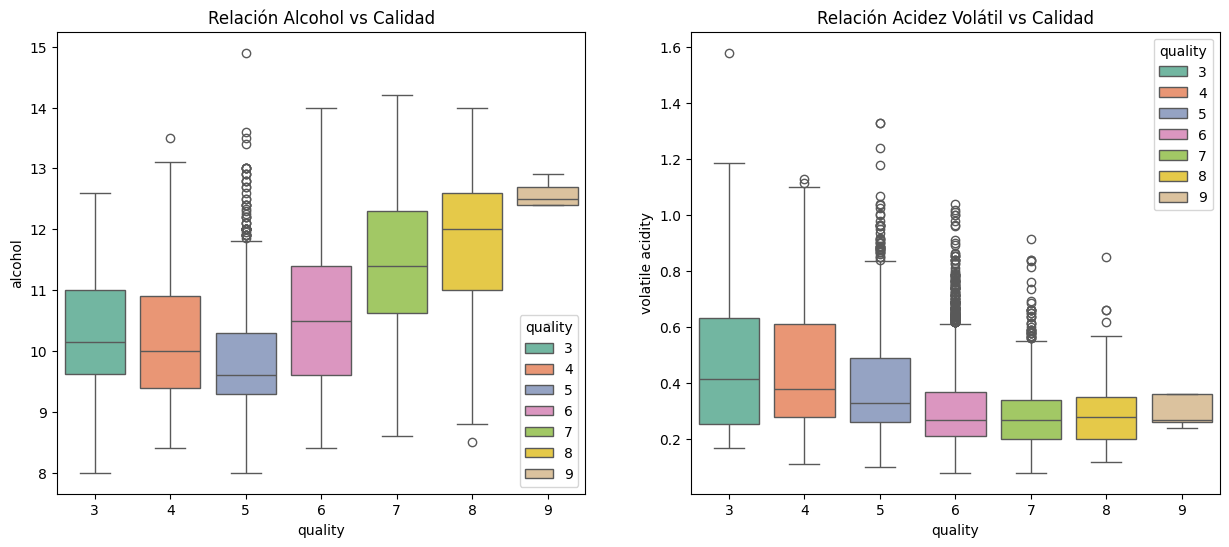

<Figure size 640x480 with 0 Axes>

In [14]:
# Boxplots: Alcohol y Acidez Volátil vs Calidad

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='quality', y='alcohol', data=df, ax=ax1, palette='Set2', hue='quality')
ax1.set_title('Relación Alcohol vs Calidad')

sns.boxplot(x='quality', y='volatile acidity', data=df, ax=ax2, palette='Set2', hue='quality')
ax2.set_title('Relación Acidez Volátil vs Calidad')

plt.show()
ruta_guardado = os.path.join (r'A:/Clases/practica_vinos/graficos', 'oh_ac_calidad.png')
plt.savefig(ruta_guardado)

Análisis: En el gráfico de alcohol, verás que la mediana (la línea dentro de la caja) sube claramente a medida que la calidad aumenta. En la acidez volátil, ocurre lo contrario: los vinos de alta calidad (7 u 8) tienen rangos de acidez mucho más bajos y controlados.

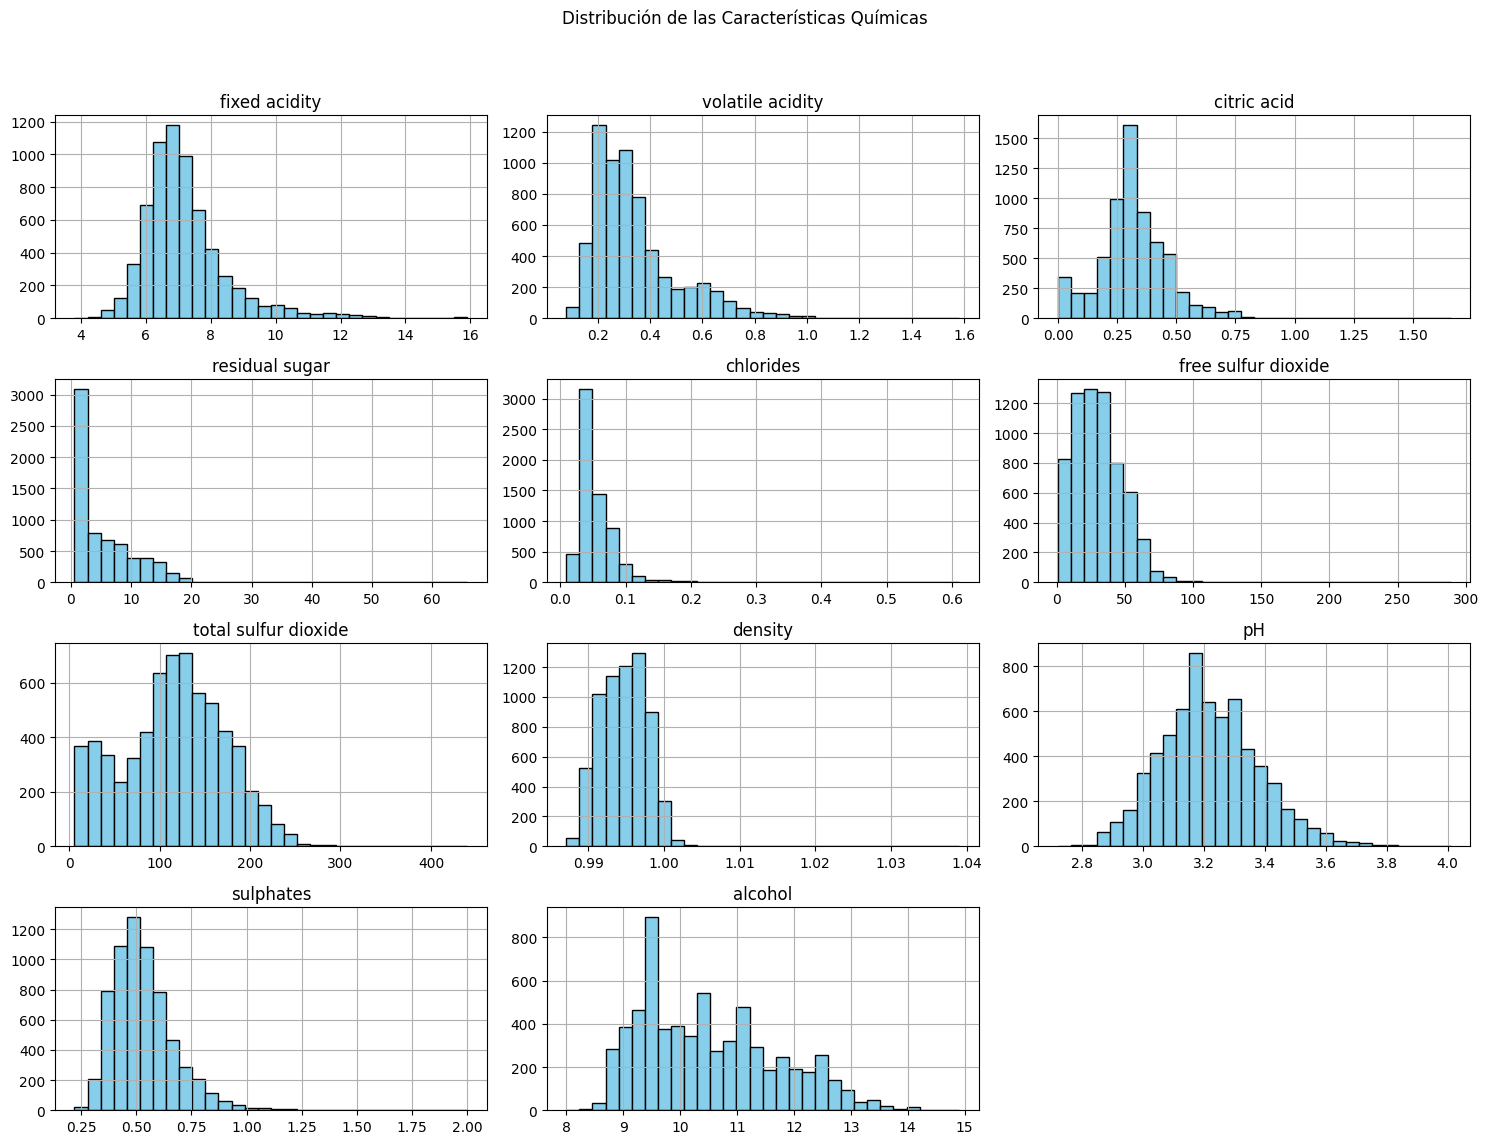

<Figure size 640x480 with 0 Axes>

In [15]:
# Histogramas de Distribución Química

df.drop(['quality', 'type'], axis=1).hist(figsize=(15, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Distribución de las Características Químicas')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
ruta_guardado = os.path.join (r'A:/Clases/practica_vinos/graficos', 'carac_qca.png')
plt.savefig(ruta_guardado)

Análisis:EL residual sugar (azúcar residual) y chlorides. Tienen una "cola" muy larga hacia la derecha. Esto significa que hay algunos vinos con muchísima azúcar o mucha sal en comparación al promedio (posibles outliers).

"Tras el análisis, se observa que el alcohol y la acidez volátil son los predictores más fuertes. Dado que el dataset está desbalanceado en las notas extremas, optaremos por una clasificación binaria (Vino Bueno vs. Resto) para mejorar la eficacia del modelo."


. El Alcohol: El cuerpo y la estructura
En la matriz de correlación, el alcohol suele tener un valor positivo alto (por ejemplo, +0.44). Esto significa que, en general, a mayor graduación alcohólica, mejor es la puntuación del vino.

Razón Química: El alcohol (etanol) no solo aporta el efecto del mismo, sino que contribuye a la viscosidad y el "cuerpo" del vino. Un vino con muy poco alcohol puede sentirse "acuoso" o plano.

Correlación con la Madurez: Para obtener niveles más altos de alcohol natural, las uvas deben haber madurado más tiempo en la planta, lo que suele desarrollar sabores y aromas más complejos que los catadores valoran positivamente.

2. La Acidez Volátil: El defecto del "vinagre"
En tu gráfico de calor (Heatmap), verás que la acidez volátil tiene una correlación negativa fuerte (por ejemplo, -0.39). A mayor acidez volátil, menor es la calidad.

Razón Química: La acidez volátil es causada principalmente por el ácido acético. En concentraciones bajas, puede dar complejidad, pero si sube demasiado, el vino empieza a oler y saber a vinagre.


Indicador de Higiene: Niveles altos de acidez volátil suelen ser señal de una fermentación defectuosa o falta de higiene en la bodega (presencia de bacterias acéticas). Por eso, los vinos de alta calidad (calificación 7, 8 o 9) siempre tienen niveles muy bajos y controlados de esta variable.

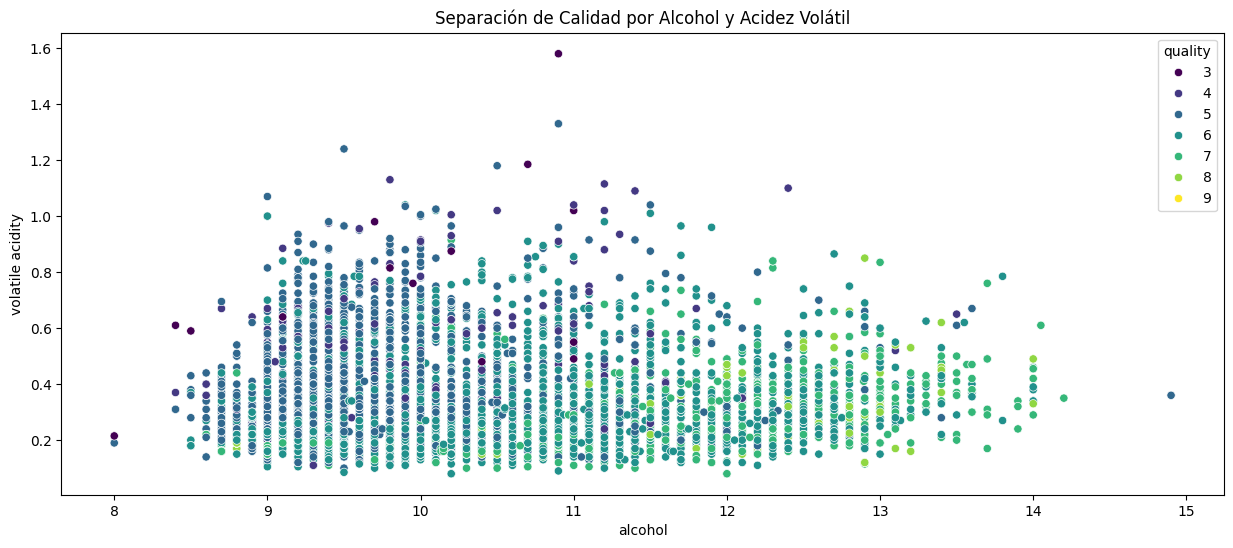

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='alcohol', y='volatile acidity', hue='quality', data=df, palette='viridis')
plt.title('Separación de Calidad por Alcohol y Acidez Volátil')
plt.show()
ruta_guardado = os.path.join (r'A:/Clases/practica_vinos/graficos', 'separacion.png')
plt.savefig(ruta_guardado)
